In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [2]:
df = pd.read_csv('data/Coffe_sales.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (3547, 11)

Column Names and Data Types:
hour_of_day      int64
cash_type       object
money          float64
coffee_name     object
Time_of_Day     object
Weekday         object
Month_name      object
Weekdaysort      int64
Monthsort        int64
Date            object
Time            object
dtype: object

First 5 rows:


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
print("Missing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Missing Values:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

Duplicate Rows: 0

Unique Values per Column:
hour_of_day: 17
cash_type: 1
money: 13
coffee_name: 8
Time_of_Day: 3
Weekday: 7
Month_name: 12
Weekdaysort: 7
Monthsort: 12
Date: 381
Time: 3547


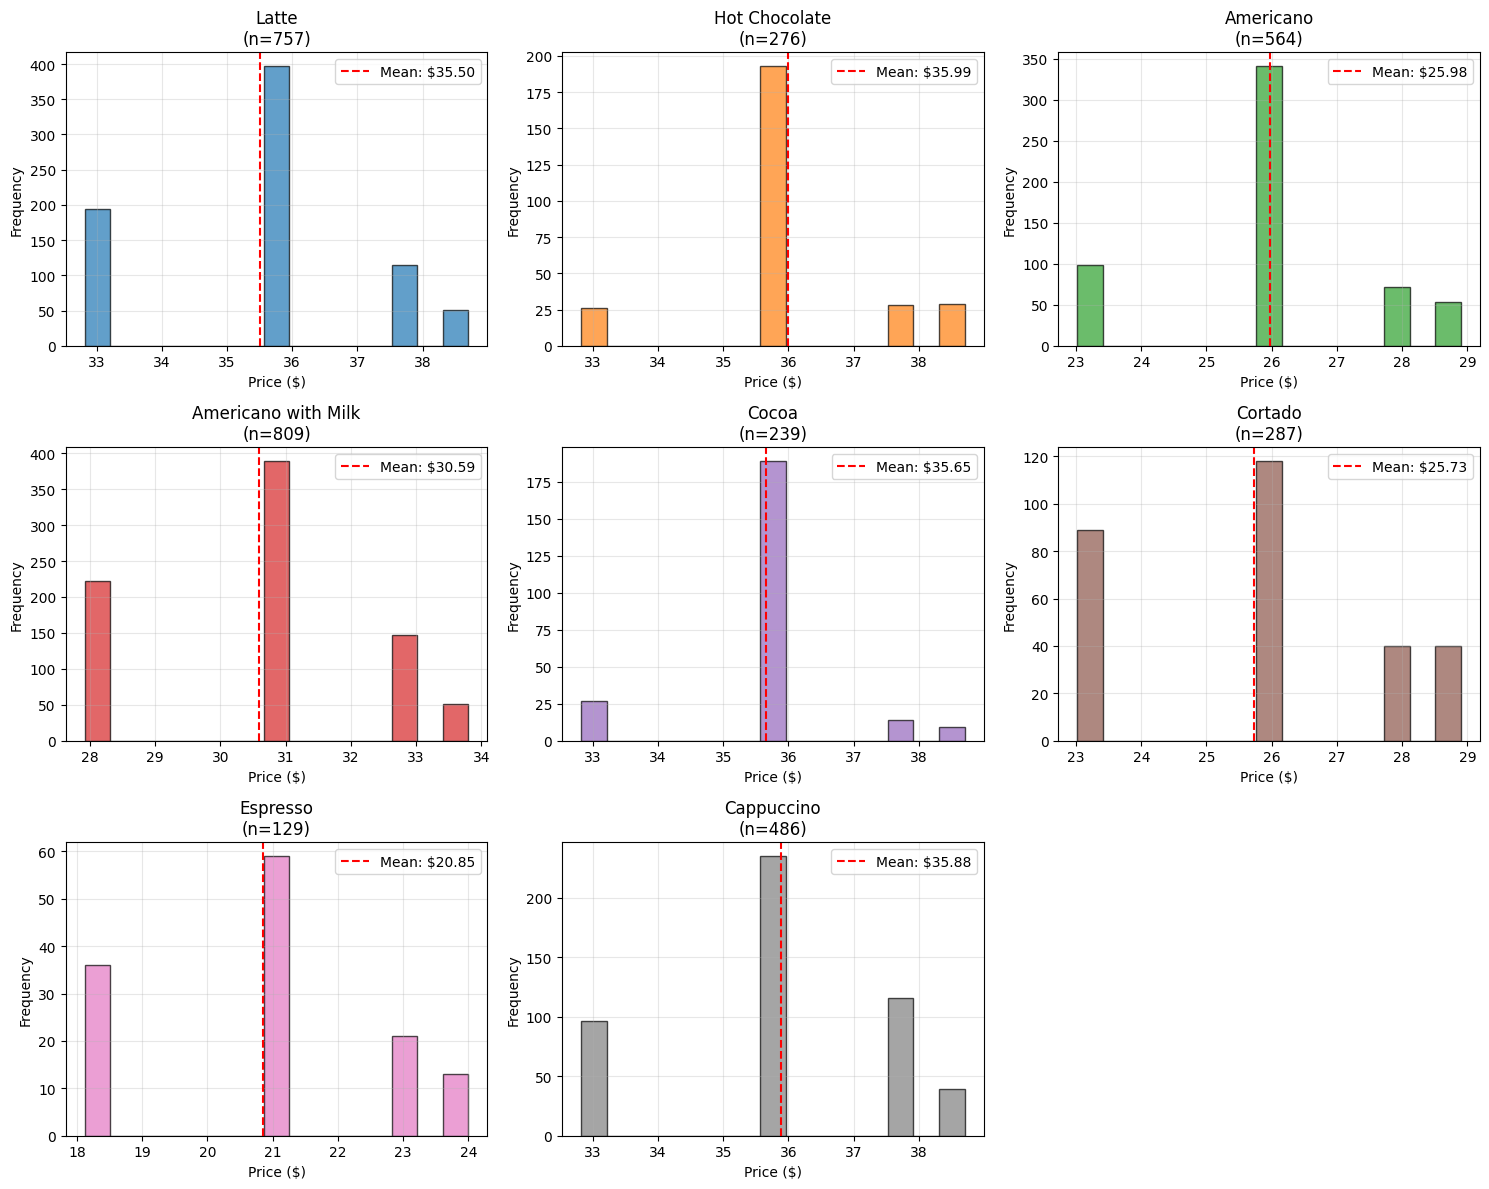

=== PRICE DISTRIBUTION BY COFFEE TYPE ===

                     count   mean   std    min   max
coffee_name                                         
Americano              564  25.98  1.68  23.02  28.9
Americano with Milk    809  30.59  1.88  27.92  33.8
Cappuccino             486  35.88  1.82  32.82  38.7
Cocoa                  239  35.65  1.23  32.82  38.7
Cortado                287  25.73  2.09  23.02  28.9
Espresso               129  20.85  1.97  18.12  24.0
Hot Chocolate          276  35.99  1.44  32.82  38.7
Latte                  757  35.50  1.82  32.82  38.7


In [4]:
# Separate histograms for each coffee type
coffee_types = df['coffee_name'].unique()
n_coffees = len(coffee_types)
cols = 3
rows = (n_coffees + cols - 1) // cols

plt.figure(figsize=(15, 4 * rows))

for i, coffee in enumerate(coffee_types):
    plt.subplot(rows, cols, i + 1)
    coffee_prices = df[df['coffee_name'] == coffee]['money']
    plt.hist(coffee_prices, bins=15, edgecolor='black', alpha=0.7, color=plt.cm.tab10(i))
    plt.title(f'{coffee}\n(n={len(coffee_prices)})')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Add mean line
    mean_price = coffee_prices.mean()
    plt.axvline(mean_price, color='red', linestyle='--', 
                label=f'Mean: ${mean_price:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Basic statistics by coffee type
print("=== PRICE DISTRIBUTION BY COFFEE TYPE ===\n")
price_stats = df.groupby('coffee_name')['money'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print(price_stats)

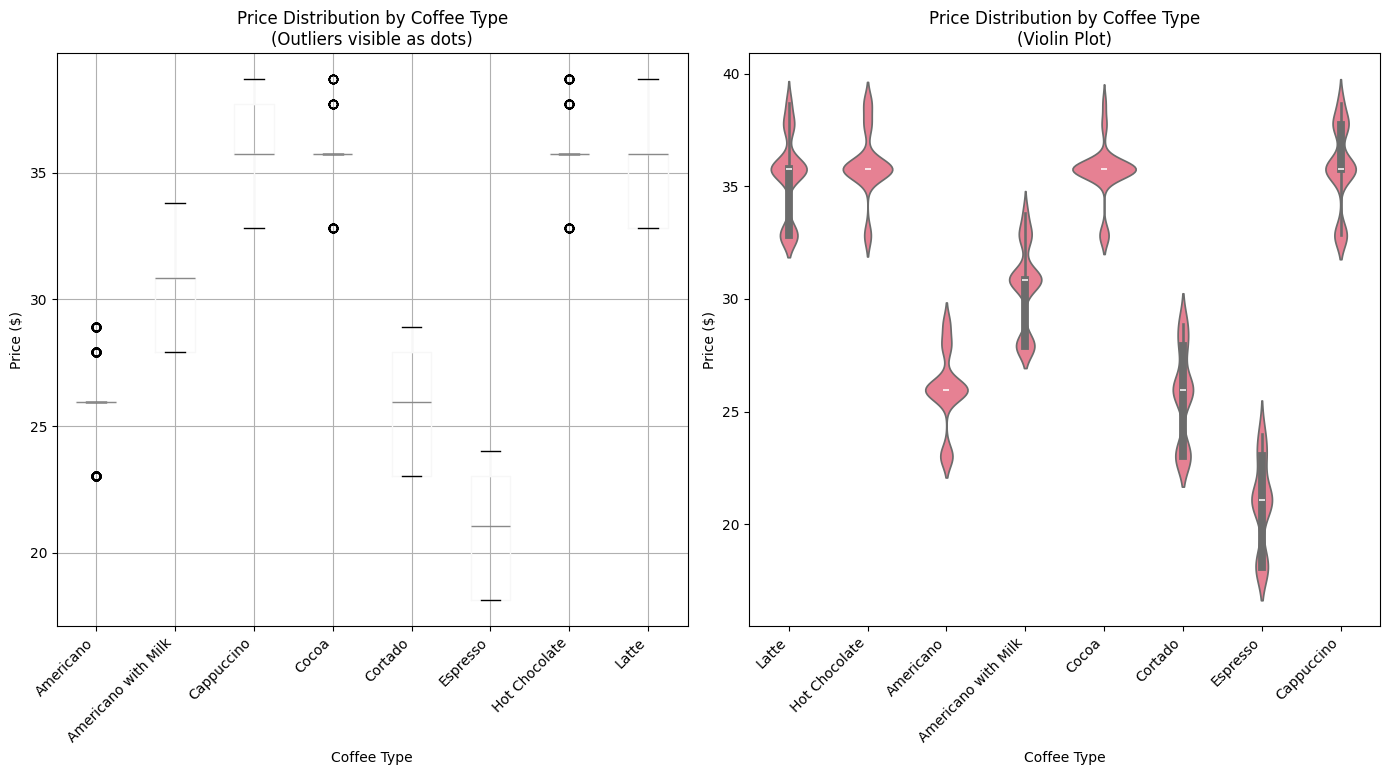

Based on price distributions, the outliers appear to be legitimate and related to coffee add-ons!


In [5]:
# Outlier detection for money by coffee type
plt.figure(figsize=(14, 8))

# Box plot to visualize outliers
plt.subplot(1, 2, 1)
df.boxplot(column='money', by='coffee_name', ax=plt.gca())
plt.title('Price Distribution by Coffee Type\n(Outliers visible as dots)')
plt.xlabel('Coffee Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.suptitle('')  # Remove default title

# Violin plot for better distribution view
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='coffee_name', y='money')
plt.title('Price Distribution by Coffee Type\n(Violin Plot)')
plt.xlabel('Coffee Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Based on price distributions, the outliers appear to be legitimate and related to coffee add-ons!")

In [6]:
# Summary statistics for numerical columns
print("Summary Statistics:")
df.describe()

Summary Statistics:


,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


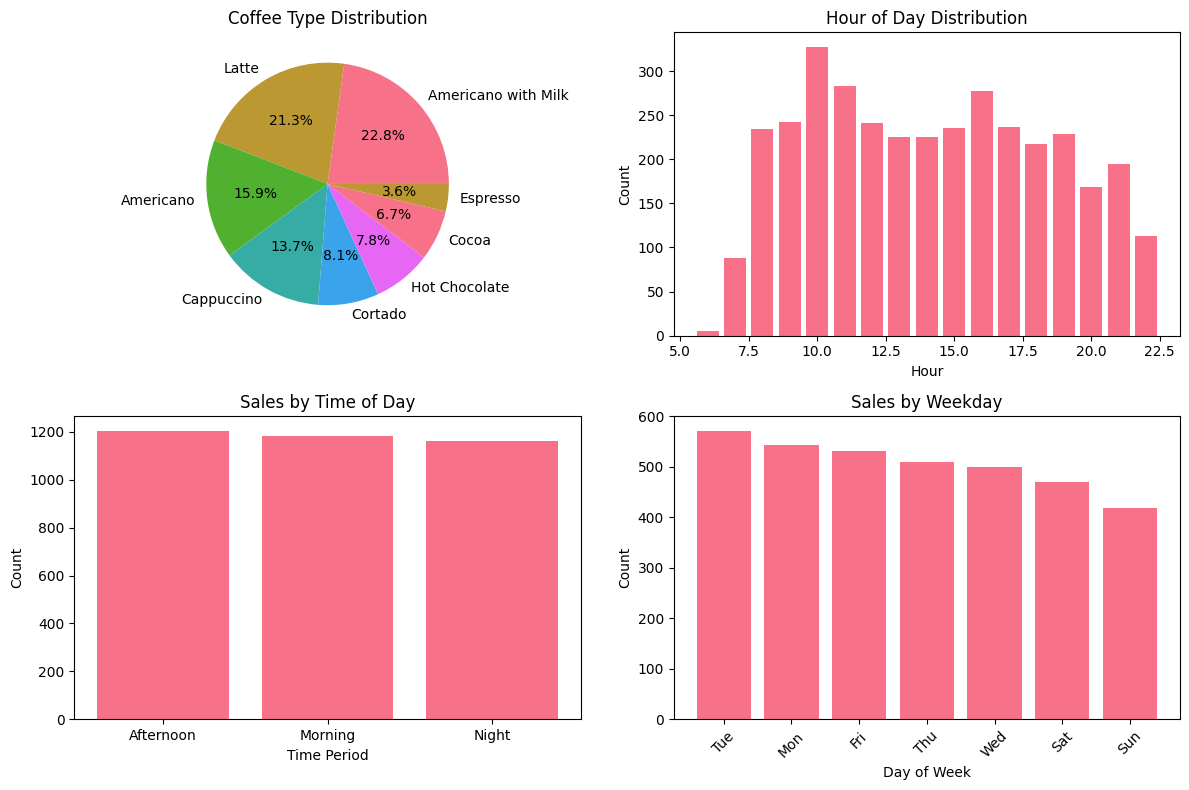

In [7]:
# Coffee sales distribution
plt.figure(figsize=(12, 8))

# Coffee type distribution
plt.subplot(2, 2, 1)
coffee_counts = df['coffee_name'].value_counts()
plt.pie(coffee_counts.values, labels=coffee_counts.index, autopct='%1.1f%%')
plt.title('Coffee Type Distribution')

# Sales by hour of day
plt.subplot(2, 2, 2)
cash_counts = df['hour_of_day'].value_counts()
plt.bar(cash_counts.index, cash_counts.values)
plt.title('Hour of Day Distribution')
plt.xlabel('Hour')
plt.ylabel('Count')

# Sales by time of day
plt.subplot(2, 2, 3)
time_counts = df['Time_of_Day'].value_counts()
plt.bar(time_counts.index, time_counts.values)
plt.title('Sales by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Count')

# Sales by weekday
plt.subplot(2, 2, 4)
weekday_counts = df['Weekday'].value_counts()
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Sales by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

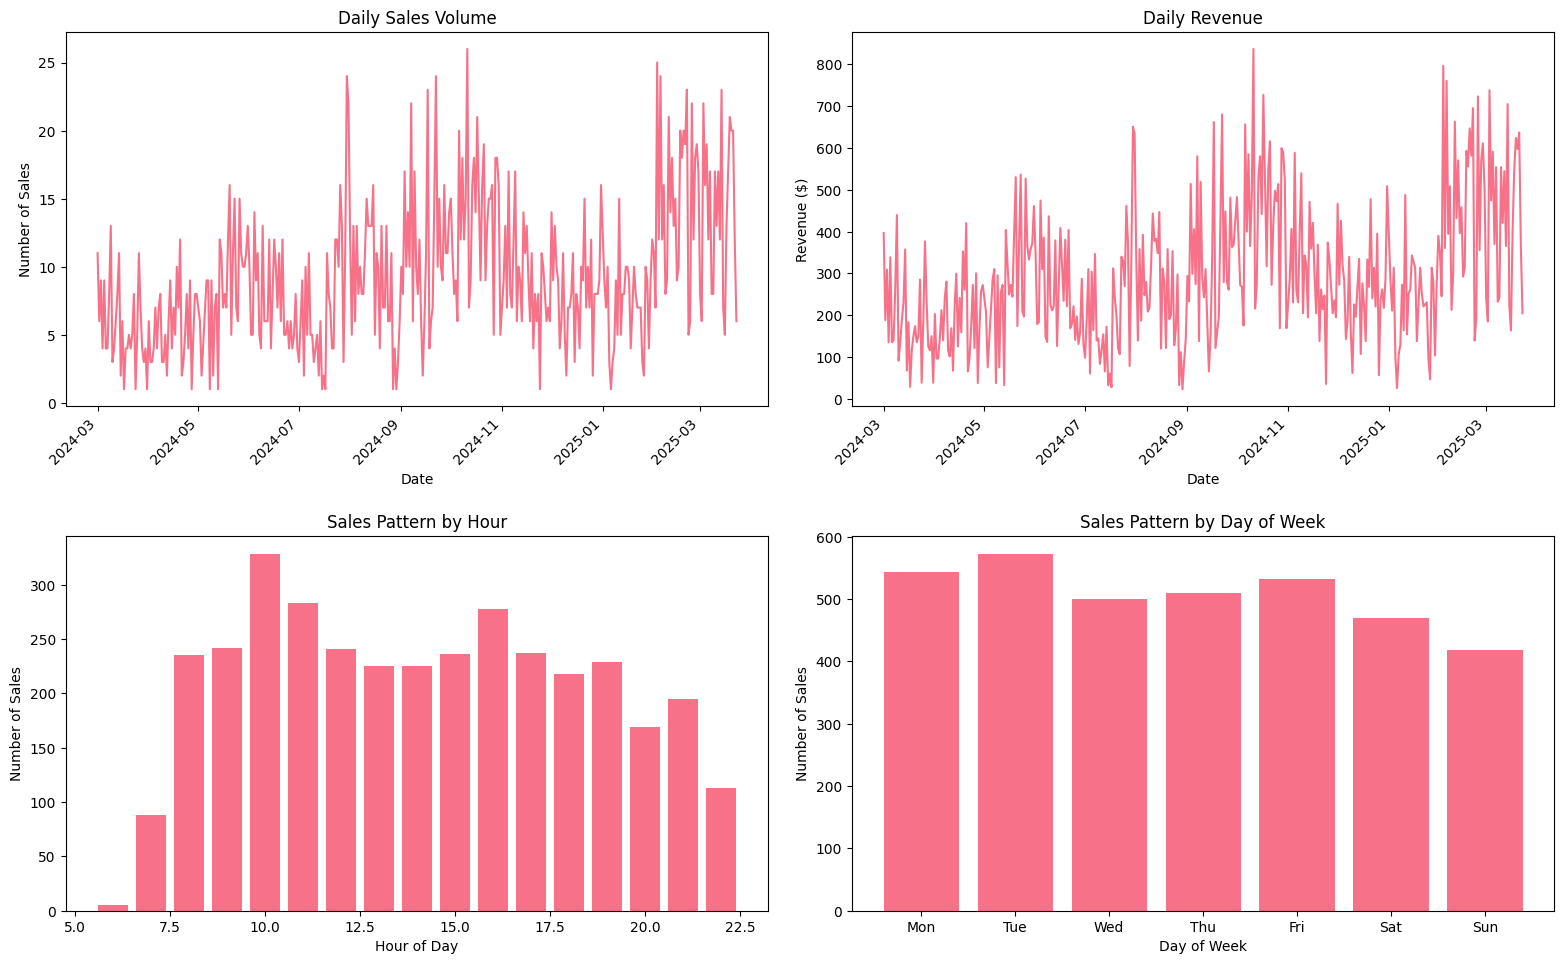

In [6]:
# Time series analysis
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='mixed')

plt.figure(figsize=(16, 10))

# Daily sales volume
plt.subplot(2, 2, 1)
daily_sales = df.groupby(df['datetime'].dt.date).size()
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Volume')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')

# Daily revenue
plt.subplot(2, 2, 2)
daily_revenue = df.groupby(df['datetime'].dt.date)['money'].sum()
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')

# Hourly sales pattern
plt.subplot(2, 2, 3)
hourly_sales = df.groupby('hour_of_day').size()
plt.bar(hourly_sales.index, hourly_sales.values)
plt.title('Sales Pattern by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')

# Weekly sales pattern
plt.subplot(2, 2, 4)
weekly_sales = df.groupby('Weekdaysort').size()
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(range(len(weekly_sales)), weekly_sales.values)
plt.title('Sales Pattern by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sales')
plt.xticks(range(len(weekly_sales)), [weekday_names[i-1] for i in weekly_sales.index])

plt.tight_layout(pad=2.0)
plt.show()

In [3]:
# variance of daily sales and weekly sales
daily_sales = df.groupby(df['datetime'].dt.date).agg({
    'money': ['sum', 'count'],  # Daily revenue and transaction count
}).round(2)

daily_sales.columns = ['daily_revenue', 'daily_transactions']
daily_sales = daily_sales.reset_index()


df['week'] = df['datetime'].dt.isocalendar().week
df['year_week'] = df['datetime'].dt.strftime('%Y-W%U')
weekly_sales = df.groupby('year_week').agg({
    'money': ['sum', 'count'],  # Weekly revenue and transaction count
}).round(2)

weekly_sales.columns = ['weekly_revenue', 'weekly_transactions']
weekly_sales = weekly_sales.reset_index()

print(f"Daily Revenue Standard Deviation: ${daily_sales['daily_revenue'].std():.2f}")
print(f"Weekly Revenue Standard Deviation: ${weekly_sales['weekly_revenue'].std():.2f}")

KeyError: 'datetime'

In [10]:
daily_revenue_cv = (daily_sales['daily_revenue'].std() / daily_sales['daily_revenue'].mean()) * 100
weekly_revenue_cv = (weekly_sales['weekly_revenue'].std() / weekly_sales['weekly_revenue'].mean()) * 100

print(" Coefficient of Variation")
print(f"   Daily Revenue CV:  {daily_revenue_cv:.1f}%")
print(f"   Weekly Revenue CV: {weekly_revenue_cv:.1f}%")
print(f"   Choose for modeling: {'Weekly' if weekly_revenue_cv < daily_revenue_cv else 'Daily'}")

 Coefficient of Variation
   Daily Revenue CV:  55.4%
   Weekly Revenue CV: 43.5%
   Choose for modeling: Weekly


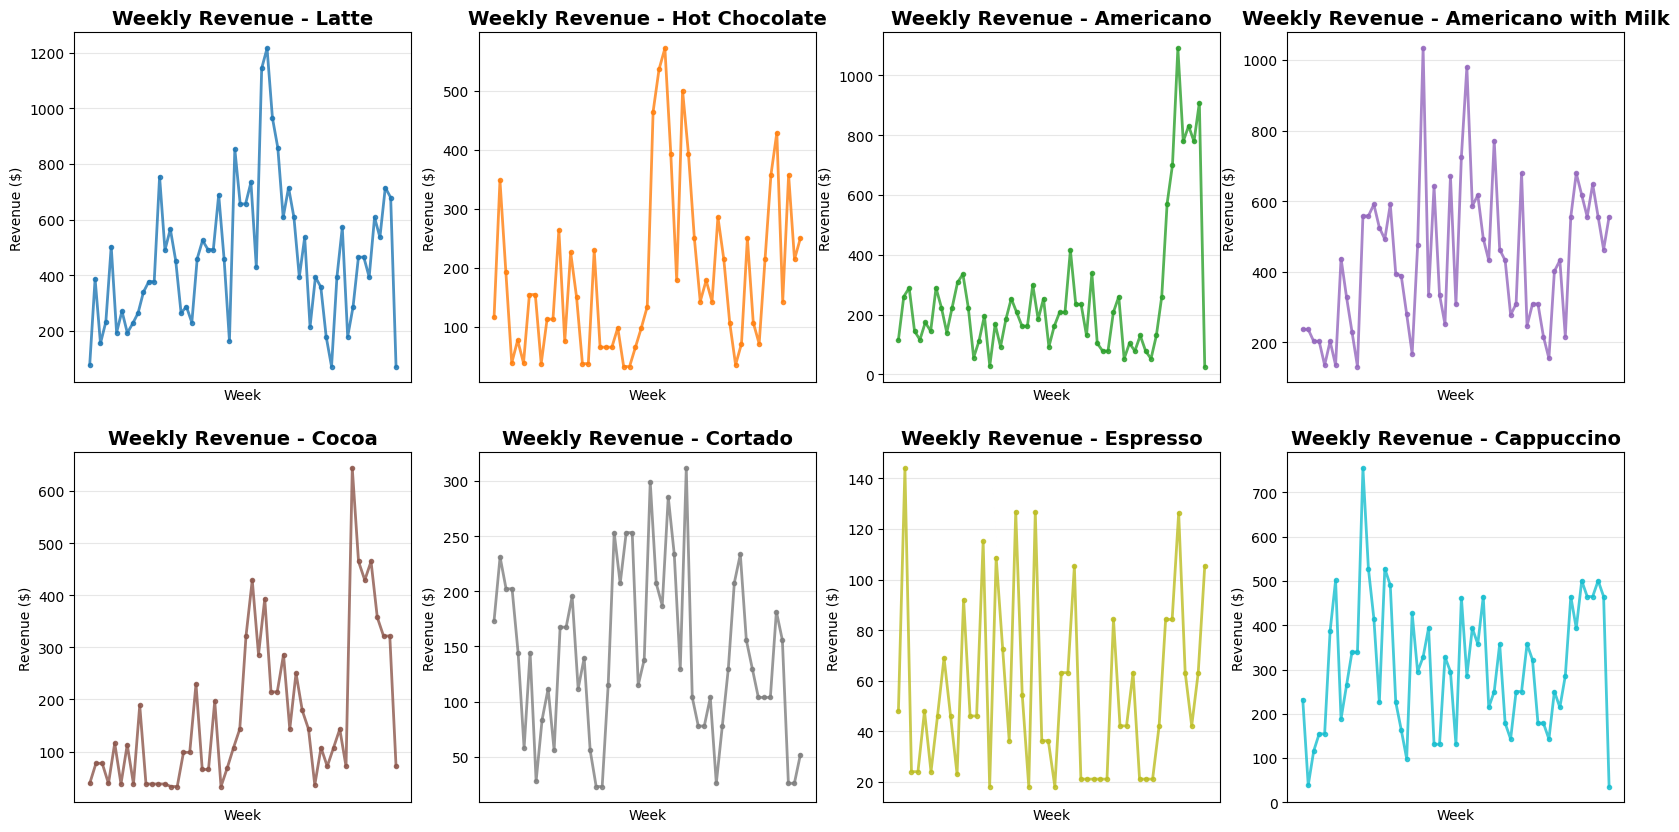

In [11]:
# Plot weekly revenue for each coffee type separately
coffee_types = df['coffee_name'].unique()
n_coffees = len(coffee_types)

cols = 4
rows = (n_coffees + cols - 1) // cols

plt.figure(figsize=(20, 5 * rows))

# Colors for each coffee type
colors = plt.cm.tab10(np.linspace(0, 1, n_coffees))

for i, coffee in enumerate(coffee_types):
    plt.subplot(rows, cols, i + 1)
    
    # Get weekly revenue data for this coffee type
    coffee_weekly = df[df['coffee_name'] == coffee].groupby('year_week')['money'].sum().reset_index()
    coffee_weekly.columns = ['year_week', 'weekly_revenue']
    
    # Sort by week for proper time series plotting
    coffee_weekly = coffee_weekly.sort_values('year_week')
    
    plt.plot(coffee_weekly['year_week'], coffee_weekly['weekly_revenue'], 
             linewidth=2, marker='o', markersize=3, color=colors[i], alpha=0.8)
    
    plt.title(f'Weekly Revenue - {coffee}', fontsize=14, fontweight='bold')
    plt.xlabel('Week', fontsize=10)
    plt.ylabel('Revenue ($)', fontsize=10)
    # plt.xticks(rotation=45, ha='right')
    plt.xticks([])
    plt.grid(True, alpha=0.3)

### Feature engineering for LightGBM revenue prediction by coffee_name at the weekly Level

In [9]:
# Create week identifiers - using ONLY week_start_date for consistency
df['week_start_date'] = df['datetime'].dt.to_period('W').dt.start_time

# Add missing columns for aggregation
df['day_of_week'] = df['datetime'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['month'] = df['datetime'].dt.month
df['week_of_year'] = df['datetime'].dt.isocalendar().week

# Weekly aggregation by coffee type - GROUP BY week_start_date and coffee_name ONLY
weekly_features = df.groupby(['week_start_date', 'coffee_name']).agg({
    # Target: Weekly revenue
    'money': ['sum', 'count', 'mean', 'std'],
    
    # Temporal features
    'month': 'first',
    'week_of_year': 'first',
    
    # Hour distribution - weekly patterns
    'hour_of_day': ['mean', 'std', 'min', 'max'],  # Weekly hour distribution statistics
    
    # Day of week distribution
    'day_of_week': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],  # Most common day pattern
    'is_weekend': 'mean',  # Proportion of weekend sales
    
    # Time of day patterns
    'Time_of_Day': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'Weekday': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]
}).reset_index()

# Flatten column names
weekly_features.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in weekly_features.columns]

# Rename key columns
weekly_features = weekly_features.rename(columns={
    'money_sum': 'weekly_revenue',
    'money_count': 'weekly_transactions',
    'money_mean': 'avg_transaction_value',
    'money_std': 'transaction_value_volatility',
    'is_weekend_mean': 'weekend_sales_proportion',
    'day_of_week_<lambda>': 'dominant_day_of_week',
    'Time_of_Day_<lambda>': 'dominant_time_of_day',
    'Weekday_<lambda>': 'dominant_weekday'
})

# Create year_week for reference (after aggregation, so it won't cause duplicates)
weekly_features['year_week'] = weekly_features['week_start_date'].dt.strftime('%Y-W%U')

print(f"Weekly dataset shape: {weekly_features.shape}")
print(f"Date range: {weekly_features['week_start_date'].min()} to {weekly_features['week_start_date'].max()}")
print(f"Coffee types: {weekly_features['coffee_name'].nunique()}")
print(f"Unique weeks: {weekly_features['week_start_date'].nunique()}")
print(f"Expected total: {weekly_features['week_start_date'].nunique()} weeks × {weekly_features['coffee_name'].nunique()} coffees = {weekly_features['week_start_date'].nunique() * weekly_features['coffee_name'].nunique()}")
print(f"Actual total: {len(weekly_features)}")
if len(weekly_features) == weekly_features['week_start_date'].nunique() * weekly_features['coffee_name'].nunique():
    print("✅ No duplicates! Each week-coffee combination appears exactly once.")


Weekly dataset shape: (421, 17)
Date range: 2024-02-26 00:00:00 to 2025-03-17 00:00:00
Coffee types: 8
Unique weeks: 56
Expected total: 56 weeks × 8 coffees = 448
Actual total: 421


### ✅ Verification: Confirming No Duplicate Week-Coffee Combinations

In [10]:
# Check for duplicate coffee-week combinations in the aggregated data
print("=" * 80)
print("CHECKING FOR DUPLICATES IN WEEKLY AGGREGATION")
print("=" * 80)

# Count occurrences of each week-coffee combination
duplicate_check = weekly_features.groupby(['week_start_date', 'coffee_name']).size().reset_index(name='count')
duplicates_found = duplicate_check[duplicate_check['count'] > 1]

print(f"\nTotal week-coffee combinations: {len(duplicate_check)}")
print(f"Combinations with duplicates: {len(duplicates_found)}")

if len(duplicates_found) > 0:
    print(f"\n⚠️ WARNING: Found {len(duplicates_found)} duplicate week-coffee combinations!")
    print(f"\nTop 10 duplicates:")
    print(duplicates_found.sort_values('count', ascending=False).head(10))
    
    # Show example
    example = duplicates_found.iloc[0]
    example_date = example['week_start_date']
    example_coffee = example['coffee_name']
    
    print(f"\n📋 Example: {example_coffee} on {example_date}")
    example_rows = weekly_features[(weekly_features['week_start_date'] == example_date) & 
                                   (weekly_features['coffee_name'] == example_coffee)]
    print(example_rows[['year_week', 'week_start_date', 'coffee_name', 'weekly_revenue', 'weekly_transactions']])
    
    # Check if year_week is different for same week_start_date
    if len(example_rows['year_week'].unique()) > 1:
        print(f"\n❗ Root cause: Different year_week values for same week_start_date!")
        print(f"   year_week values: {example_rows['year_week'].unique()}")
else:
    print("\n✅ No duplicates found! Each week-coffee combination appears exactly once.")

CHECKING FOR DUPLICATES IN WEEKLY AGGREGATION

Total week-coffee combinations: 421
Combinations with duplicates: 0

✅ No duplicates found! Each week-coffee combination appears exactly once.


In [11]:
# weekly feature engineering
df_weekly = weekly_features.copy()

# Coffee-specific features
coffee_encoder = {coffee: i for i, coffee in enumerate(df_weekly['coffee_name'].unique())}
df_weekly['coffee_encoded'] = df_weekly['coffee_name'].map(coffee_encoder)

# Sort by coffee and week for time series features
df_weekly = df_weekly.sort_values(['coffee_name', 'week_start_date'])

# Lag features
df_weekly['prev_week_revenue'] = df_weekly.groupby('coffee_name')['weekly_revenue'].shift(1)
df_weekly['prev_week_transactions'] = df_weekly.groupby('coffee_name')['weekly_transactions'].shift(1)
df_weekly['prev_2week_revenue'] = df_weekly.groupby('coffee_name')['weekly_revenue'].shift(2)
df_weekly['prev_3week_revenue'] = df_weekly.groupby('coffee_name')['weekly_revenue'].shift(3)
df_weekly['prev_2week_transactions'] = df_weekly.groupby('coffee_name')['weekly_transactions'].shift(2)
df_weekly['prev_3week_transactions'] = df_weekly.groupby('coffee_name')['weekly_transactions'].shift(3)

# seasonal encodings (each month goes to a sin or cos value of 0 or 1)
df_weekly['week_of_year_sin'] = np.sin(2 * np.pi * df_weekly['week_of_year_first'] / 52)
df_weekly['week_of_year_cos'] = np.cos(2 * np.pi * df_weekly['week_of_year_first'] / 52)
df_weekly['month_sin'] = np.sin(2 * np.pi * df_weekly['month_first'] / 12)
df_weekly['month_cos'] = np.cos(2 * np.pi * df_weekly['month_first'] / 12)

# Rolling features
df_weekly['revenue_4w_mean'] = df_weekly.groupby('coffee_name')['weekly_revenue'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean().shift(1))
df_weekly['revenue_4w_std'] = df_weekly.groupby('coffee_name')['weekly_revenue'].transform(
    lambda x: x.rolling(window=4, min_periods=1).std().shift(1))
df_weekly['transactions_4w_mean'] = df_weekly.groupby('coffee_name')['weekly_transactions'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean().shift(1))
df_weekly['revenue_8w_mean'] = df_weekly.groupby('coffee_name')['weekly_revenue'].transform(
    lambda x: x.rolling(window=8, min_periods=1).mean().shift(1))
df_weekly['revenue_12w_mean'] = df_weekly.groupby('coffee_name')['weekly_revenue'].transform(
    lambda x: x.rolling(window=12, min_periods=1).mean().shift(1))
df_weekly['transactions_8w_mean'] = df_weekly.groupby('coffee_name')['weekly_transactions'].transform(
    lambda x: x.rolling(window=8, min_periods=1).mean().shift(1))
df_weekly['transactions_12w_mean'] = df_weekly.groupby('coffee_name')['weekly_transactions'].transform(
    lambda x: x.rolling(window=12, min_periods=1).mean().shift(1))

# historical comparison features
df_weekly['revenue_same_week_4w_ago'] = df_weekly.groupby('coffee_name')['weekly_revenue'].shift(4)
df_weekly['revenue_same_week_8w_ago'] = df_weekly.groupby('coffee_name')['weekly_revenue'].shift(8)

# interaction features
df_weekly['prev_revenue_x_month'] = df_weekly['prev_week_revenue'] * df_weekly['month_first']
df_weekly['prev_revenue_x_week_of_year'] = df_weekly['prev_week_revenue'] * df_weekly['week_of_year_first']
df_weekly['transactions_x_weekend_prop'] = df_weekly['prev_week_transactions'] * df_weekly['weekend_sales_proportion']
df_weekly['coffee_month_interaction'] = df_weekly['coffee_encoded'] * df_weekly['month_first']
df_weekly['weekend_proportion_interaction'] = df_weekly['weekend_sales_proportion'] * df_weekly['coffee_encoded']

# Fill NaN values
df_weekly = df_weekly.fillna(0)

print(f"Created weekly features with ONLY safe_features_only")
print(f"Total columns: {len(df_weekly.columns)}")


Created weekly features with ONLY safe_features_only
Total columns: 42


In [14]:
df_weekly.dtypes

year_week                                 object
week_start_date                   datetime64[ns]
coffee_name                               object
weekly_revenue                           float64
weekly_transactions                        int64
avg_transaction_value                    float64
transaction_value_volatility             float64
month_first                                int32
week_of_year_first                        UInt32
hour_of_day_mean                         float64
hour_of_day_std                          float64
hour_of_day_min                            int64
hour_of_day_max                            int64
dominant_day_of_week                       int32
weekend_sales_proportion                 float64
dominant_time_of_day                      object
dominant_weekday                          object
coffee_encoded                             int64
prev_week_revenue                        float64
prev_week_transactions                   float64
prev_2week_revenue  

In [12]:
# Save weekly features
df_weekly.to_csv("feature_data/weekly_features.csv", header=True, index=False)